In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Summary of the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# descriptive analytics for each column

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df[df['sex'] == 'female'].describe()

,age,bmi,children,charges
count,662.000000,662.000000,662.000000,662.000000
mean,39.503021,30.377749,1.074018,12569.578844
std,14.054223,6.046023,1.192115,11128.703801
min,18.000000,16.815000,0.000000,1607.510100
25%,27.000000,26.125000,0.000000,4885.158700
50%,40.000000,30.107500,1.000000,9412.962500
75%,51.750000,34.313750,2.000000,14454.691825
max,64.000000,48.070000,5.000000,63770.428010


In [ ]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
df_underw = df[df['bmi'] < 18]
df_healthy = df[(df['bmi'] > 18) & (df['bmi'] < 25)]
df_overw = df[(df['bmi'] > 25) & (df['bmi'] < 30)]
df_obese = df[df['bmi'] > 30]

In [ ]:
df_obese.shape

(705, 7)

In [ ]:
df_healthy.shape

(230, 7)

In [ ]:
pd.pivot_table(df_underw, index='bmi', columns=['gender'], values=df_underw.size, aggfunc='sum').plot.bar()
plt.show()

###Data Smoker

In [ ]:
#data smoker

df_smoker = df[df['smoker'] == 'yes']
df_smoker.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       274 non-null    int64  
 1   sex       274 non-null    object 
 2   bmi       274 non-null    float64
 3   children  274 non-null    int64  
 4   smoker    274 non-null    object 
 5   region    274 non-null    object 
 6   charges   274 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 17.1+ KB


In [ ]:
df_smoker.describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


In [ ]:
df_smoker[df_smoker['sex'] == 'male'].count()

age         159
sex         159
bmi         159
children    159
smoker      159
region      159
charges     159
dtype: int64

In [ ]:
# Smoker BMI > 25

df_smoker[df_smoker['bmi'] > 25].describe()

,age,bmi,children,charges
count,219.000000,219.000000,219.000000,219.000000
mean,38.817352,32.825890,1.082192,35116.909657
std,14.273009,5.136105,1.130317,10702.561195
min,18.000000,25.100000,0.000000,15518.180250
25%,25.500000,28.345000,0.000000,24601.558775
50%,38.000000,32.015000,1.000000,37270.151200
75%,50.000000,36.080000,2.000000,42808.670100
max,64.000000,52.580000,4.000000,63770.428010


In [ ]:
df_smoker[df_smoker['bmi'] > 25].size/df_smoker.size

0.7992700729927007

### Data Non-smoker

In [ ]:
#data non-smoker

df_nonsmoker = df[df['smoker'] == 'no']
df_nonsmoker.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.5+ KB


In [ ]:
df_nonsmoker.describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


In [ ]:
# Non-smoker BMI > 25

df_nonsmoker[df_nonsmoker['bmi'] > 25].describe()

,age,bmi,children,charges
count,872.000000,872.000000,872.000000,872.000000
mean,40.068807,32.510092,1.091743,8629.589610
std,14.017861,4.944526,1.216355,6040.553984
min,18.000000,25.080000,0.000000,1131.506600
25%,28.000000,28.697500,0.000000,4236.576662
50%,41.000000,31.862500,1.000000,7580.896950
75%,52.000000,35.762500,2.000000,11462.118712
max,64.000000,53.130000,5.000000,36910.608030


## PMF

In [ ]:
df_F = df[df['sex'] == 'female']
df_F.size

4634

In [ ]:
df_M = df[df['sex'] == 'male']
df_M.size

4732

In [ ]:
from scipy.stats import binom

binom.pmf(k = 1, n = 2, p = 0.495)

0.49994999999999995

### Distribution of charge by region

In [ ]:
# Dataset by region

df_ne = df[df['region'] == 'northeast']
df_nw = df[df['region'] == 'northwest']
df_se = df[df['region'] == 'southeast']
df_sw = df[df['region'] == 'southwest']

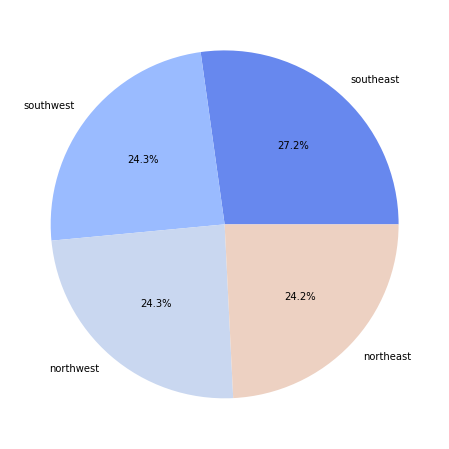

In [ ]:
df_reg = df['region'].value_counts()
colors = sns.color_palette('coolwarm')[0:8]

fig, ax = plt.subplots(figsize=(12,8))
plt.pie(df_reg, autopct='%.1f%%', colors=colors, labels=df_reg.index)
plt.show()

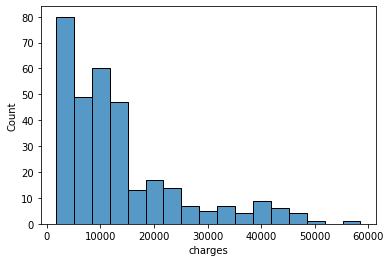

In [ ]:
#NE

sns.histplot(data=df_ne['charges'])

In [ ]:
df_se['sex'].value_counts()

male      189
female    175
Name: sex, dtype: int64

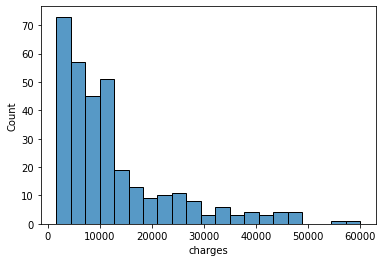

In [ ]:
#NW

sns.histplot(data=df_nw['charges'])

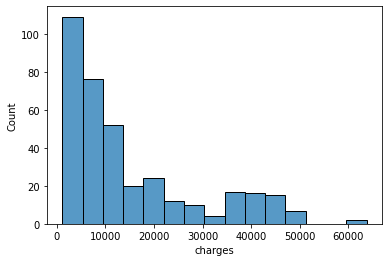

In [ ]:
#SE

sns.histplot(data=df_se['charges'])

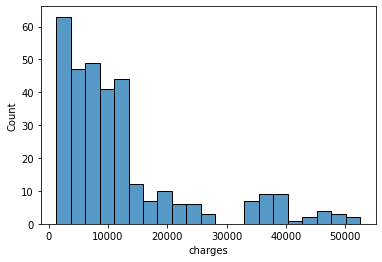

In [ ]:
#SW

sns.histplot(data=df_sw['charges'])

In [ ]:
df.groupby(['region'])['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [ ]:
# Probability of female clients given a smoker

(((df_smoker[df_smoker['sex'] == 'female'].size)/df_smoker.size)*(df_smoker.size/df.size))/(df_smoker.size/df.size)

0.4197080291970803

In [ ]:
# Probability of male clients given a smoker

(((df_smoker[df_smoker['sex'] == 'male'].size)/df_smoker.size)*(df_smoker.size/df.size))/(df_smoker.size/df.size)

0.5802919708029197

In [ ]:
# Distribution of Charge

## Variable Analysis

In [ ]:
(((df_smoker[df_smoker['charges'] > 16700].size)/df_smoker.size)*(df_smoker[df_smoker['bmi'] > 25].size)/df_smoker.size)/((df_smoker[df_smoker['bmi'] > 25].size)/df_smoker.size)

0.927007299270073

In [ ]:
((df_smoker[df_smoker['charges'] > 16700].size)/df_smoker.size)*(df_smoker.size/df.size)/(df_smoker.size/df.size)

0.927007299270073

### Charges by BMI

- Obese > 30
- Overweight 25-30
- Healthy 18.5-25
- Underweight < 18.5 

In [ ]:
df_obese = df[df['bmi'] > 30]
df_obese.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
6,46,female,33.44,1,no,southeast,8240.5896
12,23,male,34.40,0,no,southwest,1826.8430
13,56,female,39.82,0,no,southeast,11090.7178


In [ ]:
(df_obese[df_obese['charges'] > 16700].size/df_obese.size)*(df_obese.size/df.size)/(df_obese.size/df.size)

0.2695035460992908

In [ ]:
df_overw = df[(df['bmi'] > 25) & (df['bmi'] < 30)]
df_overw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
7,37,female,27.74,3,no,northwest,7281.5056
8,37,male,29.83,2,no,northeast,6406.4107


In [ ]:
(df_overw[df_overw['charges'] > 16700].size/df_overw.size)*(df_overw.size/df.size)/(df_overw.size/df.size)

0.23958333333333331

In [ ]:
df_healthy = df[(df['bmi'] > 18.5) & (df['bmi'] < 25)]
df_healthy.head()

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
15,19,male,24.600,1,no,southwest,1837.23700
17,23,male,23.845,0,no,northeast,2395.17155
26,63,female,23.085,0,no,northeast,14451.83515
35,19,male,20.425,0,no,northwest,1625.43375


In [ ]:
(df_healthy[df_healthy['charges'] > 16700].size/df_healthy.size)*(df_healthy.size/df.size)/(df_healthy.size/df.size)

0.21875000000000003

In [ ]:
df_underw = df[df['bmi'] < 18.5]
df_underw.head()

,age,sex,bmi,children,smoker,region,charges
28,23,male,17.385,1,no,northwest,2775.19215
128,32,female,17.765,2,yes,northwest,32734.18630
172,18,male,15.960,0,no,northeast,1694.79640
198,51,female,18.050,0,no,northwest,9644.25250
232,19,female,17.800,0,no,southwest,1727.78500


In [ ]:
(df_underw[df_underw['charges'] > 16700].size/df_underw.size)*(df_underw.size/df.size)/(df_underw.size/df.size)

0.1

a. BMI > 25 and charges > 16.7k, or <br>
b. BMI < 25 and charges > 16.7k

In [ ]:
df_more_25 = df[df['bmi'] > 25]
df_less_25 = df[df['bmi'] < 25]
df_charge_167 = df[df['charges'] > 16700]

In [ ]:
print(df_more_25)

      age     sex    bmi  children smoker     region     charges
0      19  female  27.90         0    yes  southwest  16884.9240
1      18    male  33.77         1     no  southeast   1725.5523
2      28    male  33.00         3     no  southeast   4449.4620
4      32    male  28.88         0     no  northwest   3866.8552
5      31  female  25.74         0     no  southeast   3756.6216
...   ...     ...    ...       ...    ...        ...         ...
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

[1091 rows x 7 columns]


In [ ]:
df_more_charge_167 = df[(df['bmi'] > 25) & (df['charges'] > 16700)]
df_less_charge_167 = df[(df['bmi'] < 25) & (df['charges'] > 16700)]

In [ ]:
(df_more_charge_167.size)/(df.size)

0.21150971599402094

In [ ]:
(df_less_charge_167.size)/(df.size)

0.03811659192825112

Given BMI > 25+ <br>
a. smokers and charges > 16.7k, or <br>
b. non-smokers and charges > 16.7k

In [ ]:
df_smoker_more_25 = df_smoker[(df_smoker['bmi'] > 25) & (df_smoker['charges'] > 16700)]
df_smoker_less_25 = df_smoker[(df_smoker['bmi'] < 25) & (df_smoker['charges'] > 16700)]
df_charge_167 = df[df['charges'] > 16700]

In [ ]:
(df_smoker_more_25.size)/(df.size)

0.16068759342301944

In [ ]:
(df_smoker_less_25.size)/(df.size)

0.02914798206278027

## Correlation

In [ ]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


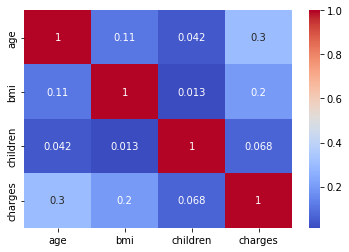

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')

## Hypothesis Testing

In [ ]:
import scipy.stats as st

In [ ]:
#T-Test

s_mean = df_smoker['charges'].mean()
nons_mean = df_nonsmoker['charges'].mean()
print(f'The difference of charges between the two groups: {nons_mean - s_mean}')

The difference of charges between the two groups: -23615.963533676637


In [ ]:
ttest0 = st.ttest_ind(a = df_smoker['charges'], b = df_nonsmoker['charges'])
ttest0.pvalue

8.271435842179102e-283

In [ ]:
p_value0 = ttest0.pvalue
print('P-Value :',p_value0)

if p_value0 >= 0.05:
    print('Smokers have higher insurance charges than non-smokers.')
else:
    print('The charges between smokers and non-smokers almost the same.')

P-Value : 8.271435842179102e-283
The charges between smokers and non-smokers almost the same.


####BMI

In [ ]:
bmi_m25 = df[df['bmi'] > 25]
bmi_l25 = df[df['bmi'] < 25]

m25_mean = bmi_m25['charges'].mean()
l25_mean = bmi_l25['charges'].mean()
print(f'The difference of charges between the two groups: {l25_mean - m25_mean}')

The difference of charges between the two groups: -3664.2515609571255


In [ ]:
ttest1 = st.ttest_ind(a = bmi_m25['charges'], b = bmi_l25['charges'])
ttest1.pvalue

1.7916455594610296e-05

In [ ]:
p_value1 = ttest1.pvalue
print('P-Value :',p_value1)

if p_value1 < 0.05:
    print('The charges between smokers and non-smokers almost the same.')
else:
    print('Smokers have higher insurance charges than non-smokers.')

P-Value : 1.7916455594610296e-05
The charges between smokers and non-smokers almost the same.


###Gender

In [ ]:
M_mean = df_M['charges'].mean()
F_mean = df_F['charges'].mean()
print(f'The difference of charges between the two groups: {F_mean - M_mean}')

The difference of charges between the two groups: -1387.1723338865468


In [ ]:
ttest2 = st.ttest_ind(a = df_M['charges'], b = df_F['charges'])
ttest2.pvalue

0.03613272100592976

In [ ]:
p_value2 = ttest2.pvalue
print('P-Value :',p_value2)

if p_value2 >= 0.05:
    print('Men have higher insurance charges than women.')
else:
    print('The charges between men and women almost the same.')

P-Value : 0.03613272100592976
The charges between men and women almost the same.


### Age

In [ ]:
df['age'].median()

39.0

In [ ]:
df['age'].value_counts().sort_index(ascending=False)

64    22
63    23
62    23
61    23
60    23
59    25
58    25
57    26
56    26
55    26
54    28
53    28
52    29
51    29
50    29
49    28
48    29
47    29
46    29
45    29
44    27
43    27
42    27
41    27
40    27
39    25
38    25
37    25
36    25
35    25
34    26
33    26
32    26
31    27
30    27
29    27
28    28
27    28
26    28
25    28
24    28
23    28
22    28
21    28
20    29
19    68
18    69
Name: age, dtype: int64

In [ ]:
df_young = df[df['age'] <= 41]
df_old = df[df['age'] > 41]

In [ ]:
y_mean = df_young['charges'].mean()
o_mean = df_old['charges'].mean()
print(f'The difference of charges between the two groups: {y_mean - o_mean}')

The difference of charges between the two groups: -6738.210066384459


In [ ]:
ttest3 = st.ttest_ind(a = df_old['charges'], b = df_young['charges'])
ttest3.pvalue

4.926339120398916e-25

In [ ]:
p_value3 = ttest3.pvalue
print('P-Value :',p_value3)

if p_value2 >= 0.05:
    print('Older people have higher insurance charges than younger.')
else:
    print('The charges between older and younger almost the same.')

P-Value : 4.926339120398916e-25
The charges between older and younger almost the same.


In [ ]:
anova_test1 = st.f_oneway(df[df['age'] >18,
                         df_nw['charges'],
                         df_se['charges'],
                         df_sw['charges'],)

SyntaxError: ignored

### Region

In [ ]:
anova_test = st.f_oneway(df_ne['charges'],
                         df_nw['charges'],
                         df_se['charges'],
                         df_sw['charges'],)

In [ ]:
print(format(anova_test.pvalue,'.22f'))

In [ ]:
if anova_test.pvalue > 0.05:
    print('Insurance charges among region is vary.')
else:
    print('There is no significant difference of insurance charges among region.')